In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
u1 = np.array([1,0.5])
cov1 = np.array([[1,0.1],[0.1,1.4]])

u2 = np.array([5,5.5])
cov2 = np.array([[1.2,0.1],[0.1,1.3]])

In [130]:
dist_1  = np.random.multivariate_normal(u1,cov1,400)
dist_2  = np.random.multivariate_normal(u2,cov2,400)

print(dist_1.shape)
print(dist_2.shape)

(400, 2)
(400, 2)


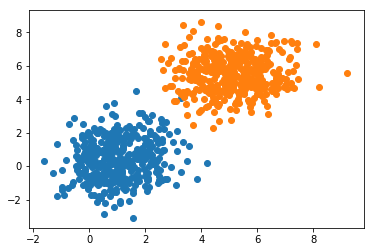

In [131]:
plt.scatter(dist_1[:,0],dist_1[:,1])
plt.scatter(dist_2[:,0],dist_2[:,1])
plt.show()

In [132]:
total = dist_1.shape[0] + dist_2.shape[0]
print(total)

800


In [133]:
data = np.zeros((total,3))

In [134]:
data[:400,:-1] = dist_1
data[400:,:-1] = dist_2
data[400:,-1] = 1

In [135]:
data

array([[-0.52950624,  2.89667197,  0.        ],
       [ 0.88684778,  0.25822501,  0.        ],
       [ 1.78479954, -0.91770552,  0.        ],
       ..., 
       [ 3.90071346,  5.14468696,  1.        ],
       [ 4.58487756,  7.68541909,  1.        ],
       [ 3.57193982,  5.55151567,  1.        ]])

In [136]:
 np.random.shuffle(data)
print(data)

[[ 6.62143703  7.34889662  1.        ]
 [ 0.81848817  0.37485112  0.        ]
 [ 1.02981091 -0.53965583  0.        ]
 ..., 
 [ 1.6767457  -0.57078788  0.        ]
 [ 1.20610158  1.29535247  0.        ]
 [ 6.67855125  5.22582045  1.        ]]


In [137]:
#normalizing data

u = np.mean(data[:,:-1],axis = 0)
sigma = np.std(data[:,:-1],axis = 0)
print(u,sigma)
data[:,:-1] = (data[:,:-1]-u)/sigma
print(data)

[ 3.05523904  2.96762591] [ 2.27442332  2.8220461 ]
[[ 1.56795701  1.55251564  1.        ]
 [-0.98343648 -0.91875706  0.        ]
 [-0.89052381 -1.24281518  0.        ]
 ..., 
 [-0.60608477 -1.25384691  0.        ]
 [-0.81301376 -0.59257481  0.        ]
 [ 1.59306853  0.80019761  1.        ]]


In [138]:
ones = np.ones((data.shape[0],1),dtype='float32')
print(ones.shape)

(800, 1)


In [139]:
final_data = np.hstack((ones,data))
print(final_data)


[[ 1.          1.56795701  1.55251564  1.        ]
 [ 1.         -0.98343648 -0.91875706  0.        ]
 [ 1.         -0.89052381 -1.24281518  0.        ]
 ..., 
 [ 1.         -0.60608477 -1.25384691  0.        ]
 [ 1.         -0.81301376 -0.59257481  0.        ]
 [ 1.          1.59306853  0.80019761  1.        ]]


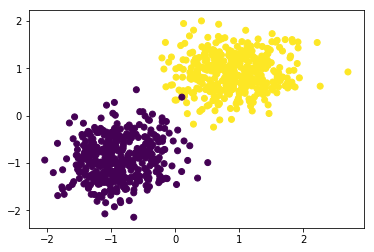

In [140]:
plt.scatter(final_data[:,1],final_data[:,2],c = final_data[:,3])
plt.show()

In [141]:
split  = int(0.8*total)
print(split)

640


In [148]:
X_train = final_data[:split,:-1]
X_test = final_data[split:,:-1]

Y_train = final_data[:split,-1]
Y_test = final_data[split:,-1]

In [149]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(640, 3) (160, 3)
(640,) (160,)


In [150]:
np.mean(X_train,axis = 0)

array([  1.00000000e+00,   8.25701844e-04,  -1.27099808e-03])

# Logistic Regression

In [151]:

def sigmoid(z):
    return 1/(1+np.exp(-z))



In [152]:
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

In [153]:
def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += -(Y[i]*np.log2(y_hat)+ (1 - Y[i])*np.log(1-y_hat))
        
    return total_error/m
    

In [154]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        grad += -(Y[i] - y_hat )*X[i].reshape(-1,1)
    
    return grad/m

In [155]:
def grad_descent(X,Y,learning_rate = 0.8):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta - learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list

In [156]:
theta ,error = grad_descent(X_train,Y_train)

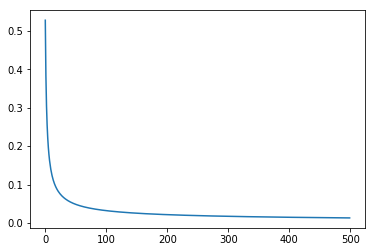

In [157]:
plt.plot(error)
plt.show()

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


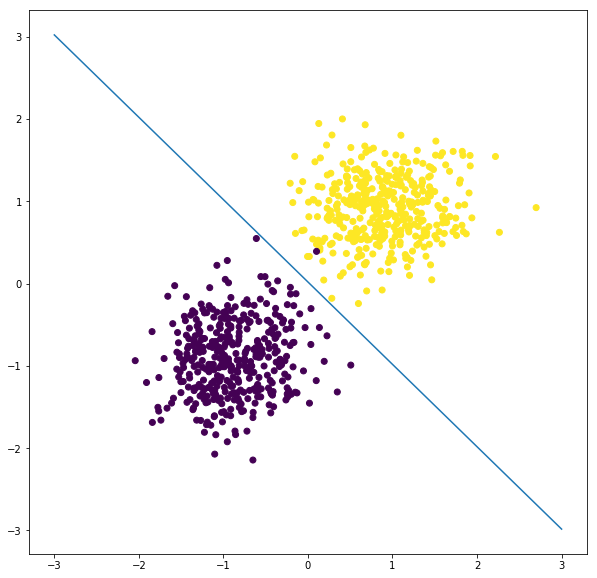

In [158]:
def drawline():
    x = np.linspace(-3,3,10)
    print(x)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.figure(figsize = (10,10))
    plt.scatter(final_data[:,1],final_data[:,2],c = final_data[:,3])
    plt.plot(x,y)
    plt.show()
    
drawline()

In [159]:
def predict(xtest,theta):
    prob = hypothesis(xtest,theta)
    if(prob<=0.5):
        return 0
    else:
        return 1

In [160]:
Y_pred = [predict(X_test[i],theta) for i in range(X_test.shape[0])]

In [161]:
Y_test = np.array(Y_pred)
Y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [162]:
np.sum(Y_pred==Y_test)*100/Y_test.shape[0]

100.0